In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns


##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)

def seed_all(seed=42):

    random.seed(seed)
    np.random.seed(seed)
    print("[ Using Seed : ", seed, " ]")

####################################
#####   SEED ALL EXPERIMENTS   #####
####################################
seed_all()

[ Using Seed :  42  ]


In [2]:
X_path = p_join('..', '..', 'data', 'Input.txt')
Y_path = p_join('..', '..', 'data', 'Topology.txt')

X = pd.read_csv(X_path).values
Y = pd.read_csv(Y_path).values.squeeze()

In [3]:
###############################
##### IMPORT ML METHODS   #####
###############################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


#################################
####### GLOBAL CONFIG ###########
#################################
CONFIG = {'scoring': 'accuracy',
          'cv': 5,
          'n_jobs': -1}

In [4]:
def select_n_center_features(data: np.ndarray, n_features: int) -> np.ndarray:
    from copy import deepcopy

    total_components = data.shape[1]
    start = int((total_components - n_features)/2)
    res = deepcopy(data)[:, start: start + n_features]
    print(f'Selected features from indexes:  [{start}, {start + n_features})')
    return res

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from copy import deepcopy

def calc_ml_method(model, config, X, Y):
    res = {}

    scoring = config.get('scoring', 'accuracy')
    cv = config.get('cv', 5)
    n_jobs = config.get('n_jobs', 4)
    
    scores = cross_val_score(model, X, Y, cv=cv, scoring=scoring, n_jobs=n_jobs)
    res[str(scoring)] = scores
        
    return res

def greed_searc_cv(model_class, params, config, X=deepcopy(X), Y=deepcopy(Y)):
    res = {}

    scoring = config.get('scoring', 'accuracy')
    cv = config.get('cv', 5)
    n_jobs = config.get('n_jobs', 4)
    
    model = GridSearchCV(model_class,
                         params,
                         scoring=scoring,
                         cv=cv,
                         n_jobs=n_jobs)
    model.fit(X, Y)
    res[f'best_{str(scoring)}_score'] = model.best_score_
    res['best_params'] = model.best_params_
    res['cv_results'] = model.cv_results_
    
    return res    

### Test `KNeighborsClassifier`

In [6]:
calc_ml_method(KNeighborsClassifier(), CONFIG, X, Y)

{'accuracy': array([1., 1., 1., 1., 1.])}

### Try `KNeighborsClassifier` Grid Search

In [7]:
greed_searc_cv(KNeighborsClassifier(),
               {'n_neighbors': [1,3,5,7], 'weights':['uniform', 'distance']},
               CONFIG,
               X, Y)

{'best_accuracy_score': 1.0,
 'best_params': {'n_neighbors': 1, 'weights': 'uniform'},
 'cv_results': {'mean_fit_time': array([0.01911035, 0.01076341, 0.02633295, 0.01338062, 0.01873851,
         0.01313734, 0.01674953, 0.01273146]),
  'std_fit_time': array([0.00700309, 0.00273689, 0.01538771, 0.00226629, 0.00678725,
         0.00379296, 0.0097446 , 0.00298891]),
  'mean_score_time': array([3.42361193, 2.92473645, 3.89207697, 3.13713341, 3.57916365,
         3.32824373, 3.64509635, 2.34721484]),
  'std_score_time': array([0.13640193, 0.0603397 , 0.20487809, 0.12171729, 0.15756408,
         0.20883695, 0.15065266, 0.45414347]),
  'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                     'uniform', 'distance', 'uniform', 'distance'],
              

### Try 16 center features

In [8]:
# Select 16 senter featrues
X = select_n_center_features(X, 16)

Selected features from indexes:  [4, 20)


In [9]:
### Log regression
accuracies_log_reg = calc_ml_method(LogisticRegression(), CONFIG, X, Y)
accuracies_log_reg

{'accuracy': array([1., 1., 1., 1., 1.])}

In [10]:
### KNN[5]
accuracies_knn = calc_ml_method(KNeighborsClassifier(n_neighbors=5), CONFIG, X, Y)
accuracies_knn

{'accuracy': array([1., 1., 1., 1., 1.])}

In [11]:
### MLP
accuracies_mlp = calc_ml_method(MLPClassifier(), CONFIG, X, Y)
accuracies_mlp

{'accuracy': array([1., 1., 1., 1., 1.])}

In [12]:
### GaussianNB
accuracies_GNB = calc_ml_method(GaussianNB(), CONFIG, X, Y)
accuracies_GNB

{'accuracy': array([1.     , 1.     , 0.99975, 1.     , 1.     ])}

In [13]:
### SVC
accuracies_SVC = calc_ml_method(svm.SVC(), CONFIG, X, Y)
accuracies_SVC

{'accuracy': array([1., 1., 1., 1., 1.])}

In [14]:
### Lin Classifier
accuracies_lin_reg = calc_ml_method(SGDClassifier(), CONFIG, X, Y)
accuracies_lin_reg

{'accuracy': array([1., 1., 1., 1., 1.])}

In [15]:
### RF Classifier
accuracies_rf = calc_ml_method(RandomForestClassifier(random_state=42), CONFIG, X, Y)
accuracies_rf

{'accuracy': array([1., 1., 1., 1., 1.])}

### Feature importance on entire dataset

Feature: 0, Score: -0.10474
Feature: 1, Score: 2.82291
Feature: 2, Score: -0.20177
Feature: 3, Score: 10.30013
Feature: 4, Score: 0.36155
Feature: 5, Score: 24.21019
Feature: 6, Score: -0.09909
Feature: 7, Score: 8.75947
Feature: 8, Score: 0.10280
Feature: 9, Score: -31.73115
Feature: 10, Score: 0.03403
Feature: 11, Score: 20.00429
Feature: 12, Score: -0.05892
Feature: 13, Score: -20.00937
Feature: 14, Score: -0.04837
Feature: 15, Score: 31.70914
Feature: 16, Score: -0.00182
Feature: 17, Score: -8.83024
Feature: 18, Score: 0.07934
Feature: 19, Score: -24.01657
Feature: 20, Score: 0.00438
Feature: 21, Score: -9.98427
Feature: 22, Score: -0.00858
Feature: 23, Score: -3.27096


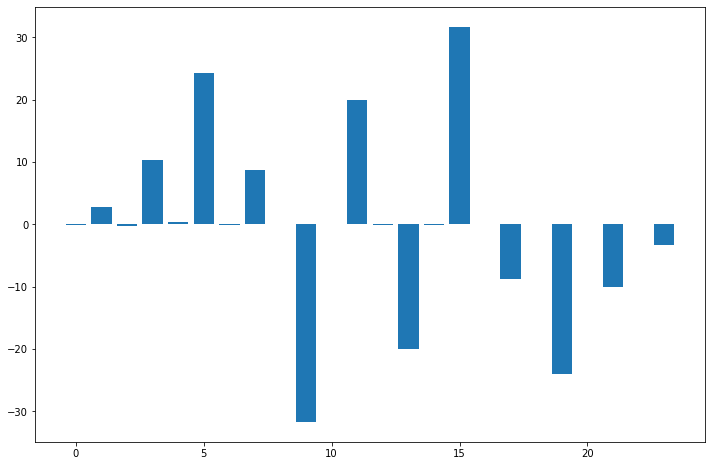

In [16]:
# Train Log Reg on entire dataset to get feature importance
X = pd.read_csv(X_path).values
Y = pd.read_csv(Y_path).values.squeeze()

model = LogisticRegression()
model.fit(X, Y)

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.13821
Feature: 1, Score: 2.82622
Feature: 2, Score: -0.23941
Feature: 3, Score: 9.01543
Feature: 4, Score: 0.27715
Feature: 5, Score: 17.98025
Feature: 6, Score: -0.21439
Feature: 7, Score: 5.53676
Feature: 8, Score: 0.21900
Feature: 9, Score: -18.86836
Feature: 10, Score: 0.02994
Feature: 11, Score: 8.00508
Feature: 12, Score: -0.13760
Feature: 13, Score: -8.07133
Feature: 14, Score: -0.09327
Feature: 15, Score: 18.93768
Feature: 16, Score: 0.06377
Feature: 17, Score: -5.54749
Feature: 18, Score: 0.14385
Feature: 19, Score: -17.87185
Feature: 20, Score: -0.01938
Feature: 21, Score: -8.73723
Feature: 22, Score: -0.02321
Feature: 23, Score: -3.34025


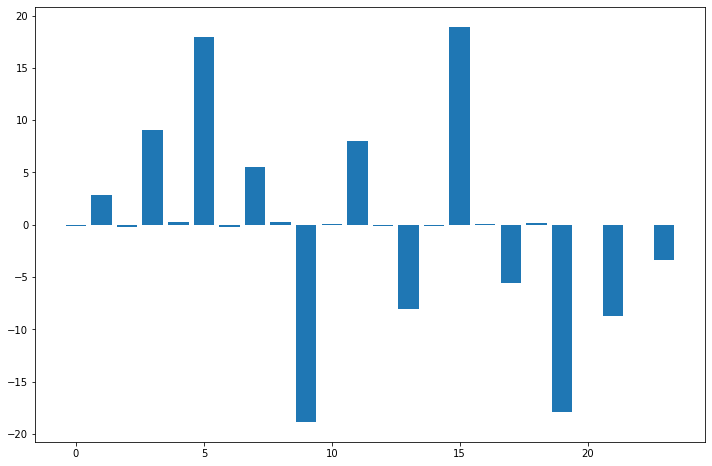

In [17]:
# Train Lin Reg on entire dataset to get feature importance
X = pd.read_csv(X_path).values
Y = pd.read_csv(Y_path).values.squeeze()

model = SGDClassifier()
model.fit(X, Y)

# get importance
importance = model.coef_[0]
# importance.shape
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

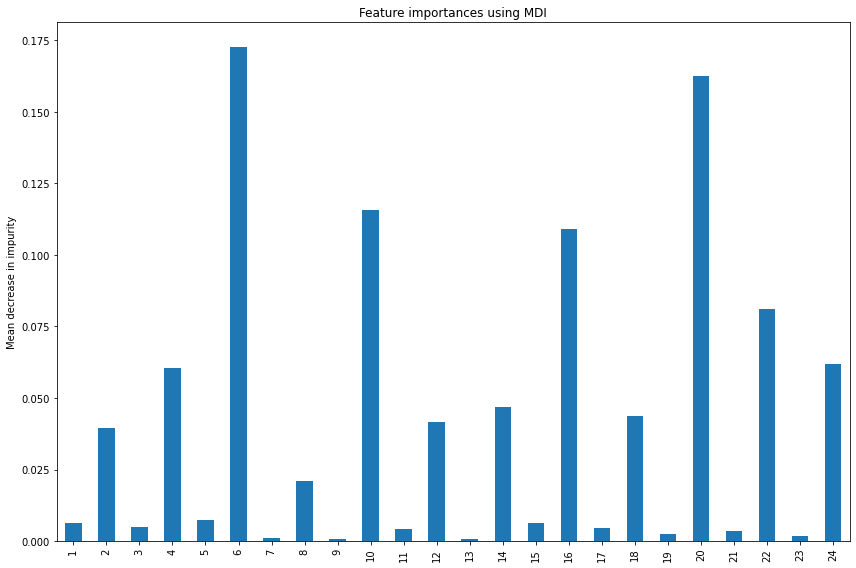

In [18]:
# Train Random Forest on entire dataset to get feature importance
X = pd.read_csv(X_path).values
Y = pd.read_csv(Y_path).values.squeeze()

forest = RandomForestClassifier(random_state=42)
forest.fit(X, Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

feature_names = [str(i + 1) for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)# yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()